In [39]:
import os
from PIL import Image  # Для отримання інформації про зображення
import pandas as pd
from IPython.display import HTML

# Функція для створення DataFrame з даними про зображення
def to_dataframe(image_folder_path):
    images_data = []

    # Перебираємо файли в папці
    for filename in os.listdir(image_folder_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg', 'gif')):
            file_path = os.path.join(image_folder_path, filename)

            # Відкриваємо зображення для отримання його даних
            with Image.open(file_path) as img:
                width, height = img.size  # Отримуємо ширину та висоту
                color_mode = img.mode  # Отримуємо кольоровий режим

            # Додаємо інформацію про зображення в список
            images_data.append({
                'name': filename,                 
                'color': color_mode,             # Кольоровий режим (RGB, RGBA тощо)
                'format': filename.split('.')[-1].upper(),
                'channels': 4 if color_mode == 'RGBA' else 3,  # Якщо RGBA - 4 канали, якщо RGB - 3 канали
                'size': round(os.path.getsize(file_path) / 1024, 2),  # Розмір в КБ
                'width': width,                   # Ширина
                'height': height,                 # Висота
                'full path': file_path,           
                'image': os.path.relpath(file_path, os.getcwd()).replace('\\', '/')
            })

    # Перетворюємо дані в DataFrame
    df = pd.DataFrame(images_data)

    # Упорядковуємо стовпці
    df = df[['name', 'color', 'format', 'channels', 'size', 'width', 'height', 'full path', 'image']]

    return df

# Вказуємо шлях до папки з зображеннями
source_folder = r'C:\Users\dioni\labs_python\laba_9\images'

# Створюємо DataFrame з зображень
dff = to_dataframe(source_folder)

# Функція для відображення зображень в таблиці
def image_formatter(value):
    return f'<img src="{value}" width="100" />'

# Виводимо таблицю з зображеннями
HTML(dff.to_html(formatters={'image': image_formatter}, escape=False))


In [40]:
import os
import random
from PIL import Image, ImageEnhance
import numpy as np
from IPython.display import display

# Функція для обрізки зображення до квадратної форми
def crop_to_square(img):
    width, height = img.size
    new_size = min(width, height)
    left = (width - new_size) / 2
    top = (height - new_size) / 2
    right = (width + new_size) / 2
    bottom = (height + new_size) / 2
    img_cropped = img.crop((left, top, right, bottom))
    return img_cropped

# Функція для накладання фільтру на зображення
def apply_filter(img, filter_type):
    img = np.array(img)  # Перетворення зображення в масив
    if filter_type == 'red':
        img[:, :, 1:] = 0  # Залишаємо тільки червоний канал
    elif filter_type == 'green':
        img[:, :, [0, 2]] = 0  # Залишаємо тільки зелений канал
    elif filter_type == 'blue':
        img[:, :, :2] = 0  # Залишаємо тільки синій канал
    elif filter_type == 'yellow':
        img[:, :, 2] = 0  # Залишаємо червоний та зелений канали
    elif filter_type == 'purple':
        img[:, :, 0] = 0  # Залишаємо зелений та синій канали
    elif filter_type == 'cyan':
        img[:, :, 1] = 0  # Залишаємо червоний та синій канали
    img = Image.fromarray(img)
    return img

# Функція для створення постера
def create_poster(image_folder, output_image_name, images_per_row, images_per_column):
    # Список всіх зображень в папці
    all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif'))]
    
    # Випадковий вибір зображень для постера
    selected_images = random.choices(all_images, k=images_per_row * images_per_column)
    
    # Підготовка зображень
    poster_images = []
    for img_name in selected_images:
        img_path = os.path.join(image_folder, img_name)
        with Image.open(img_path) as img:
            # Обрізаємо до квадратної форми
            img = crop_to_square(img)
            # Змінюємо розмір на 500x500
            img = img.resize((500, 500))
            # Випадковий вибір фільтра
            filter_type = random.choice(['red', 'green', 'blue', 'yellow', 'purple', 'cyan'])
            img = apply_filter(img, filter_type)
            poster_images.append(img)
    
    # Формування постера
    poster_width = images_per_row * 500
    poster_height = images_per_column * 500
    poster = Image.new('RGB', (poster_width, poster_height))
    
    # Розміщення зображень на постері
    for i in range(images_per_row):
        for j in range(images_per_column):
            img = poster_images.pop(0)
            poster.paste(img, (i * 500, j * 500))
            
    output_path = os.path.join(os.getcwd(), output_image_name)
    poster.save(output_path)
    # Повертаємо постер
    return poster

# Визначаємо шлях до папки з зображеннями
source_folder = r'C:\Users\dioni\labs_python\laba_9\images'


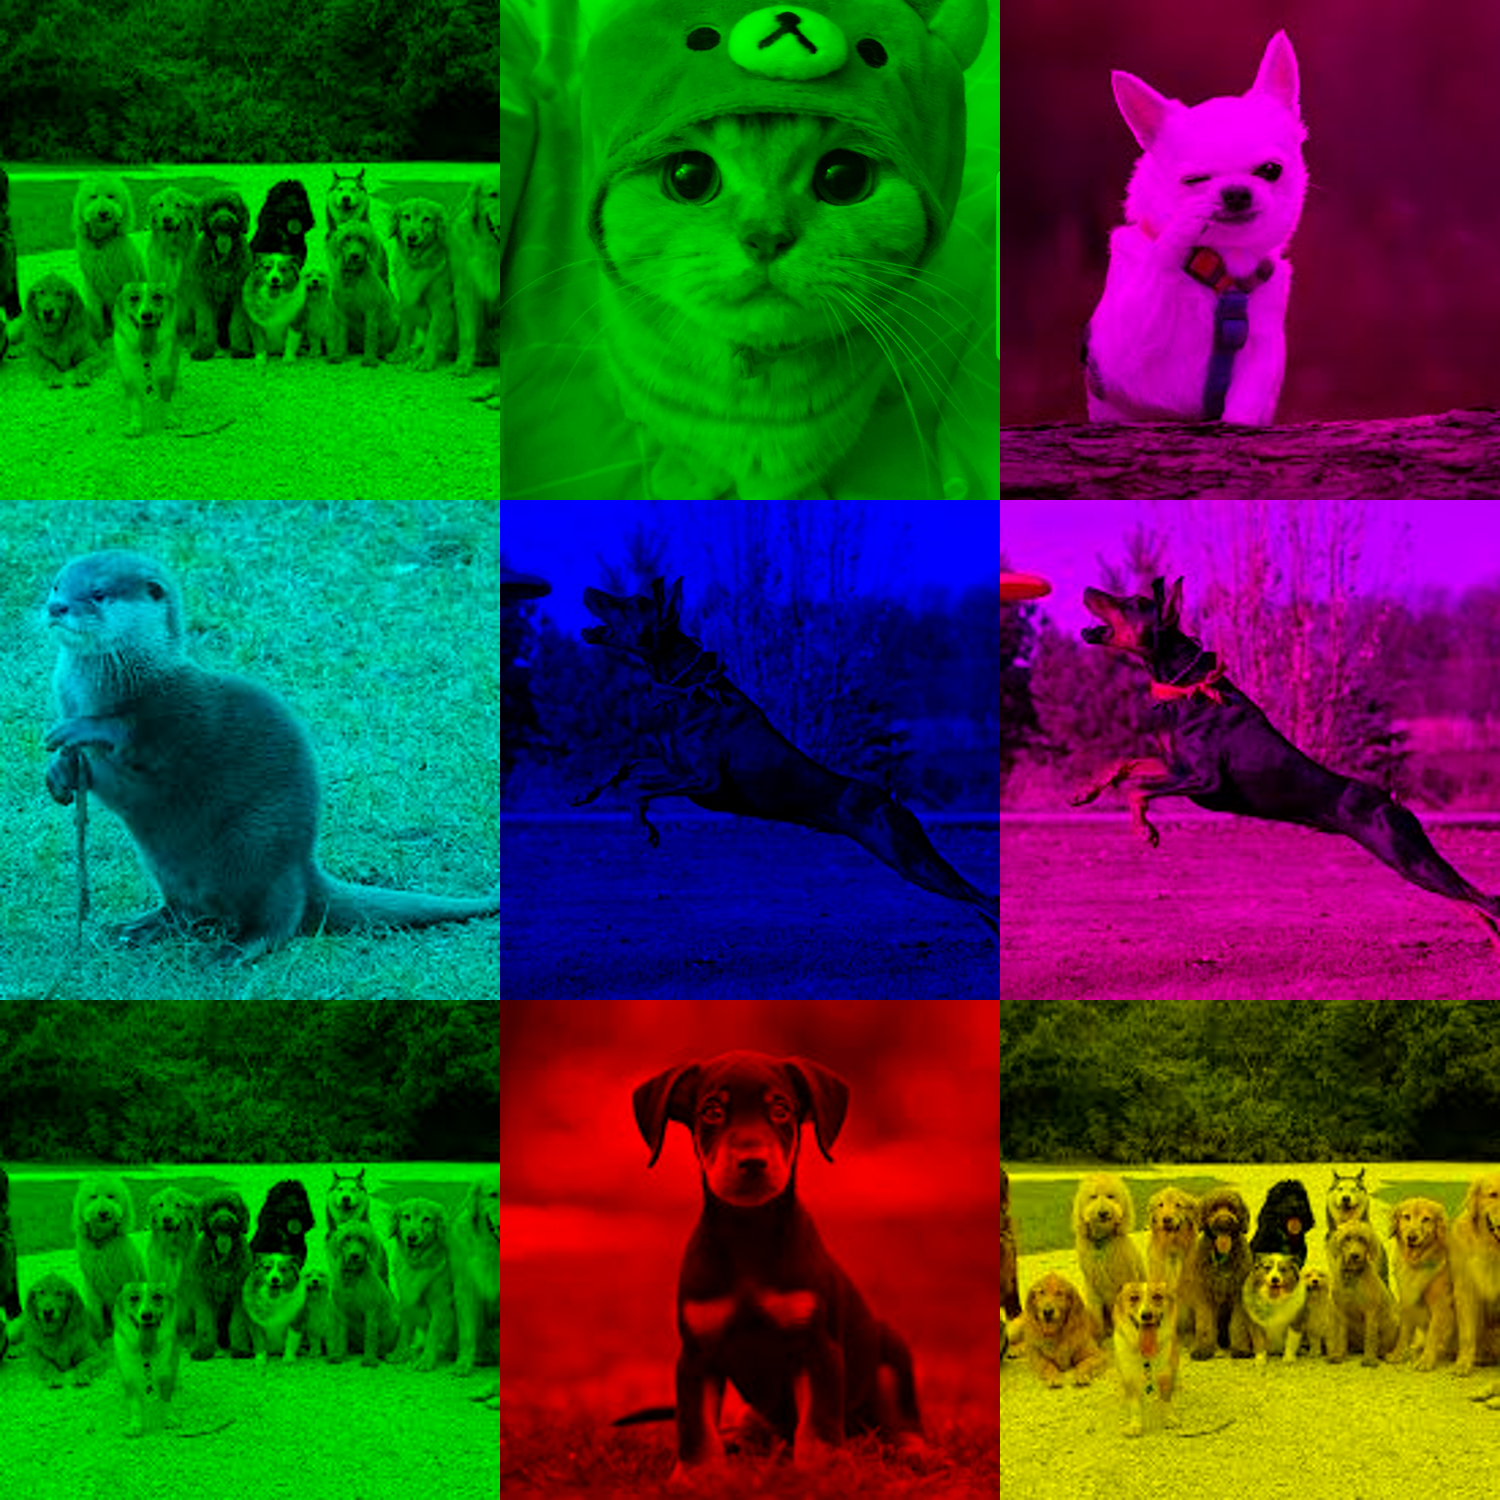

In [36]:
# Створюємо постер 3x3
poster = create_poster(source_folder, 'poster1.jpg', 3, 3)

# Виводимо постер в Jupyter
display(poster)

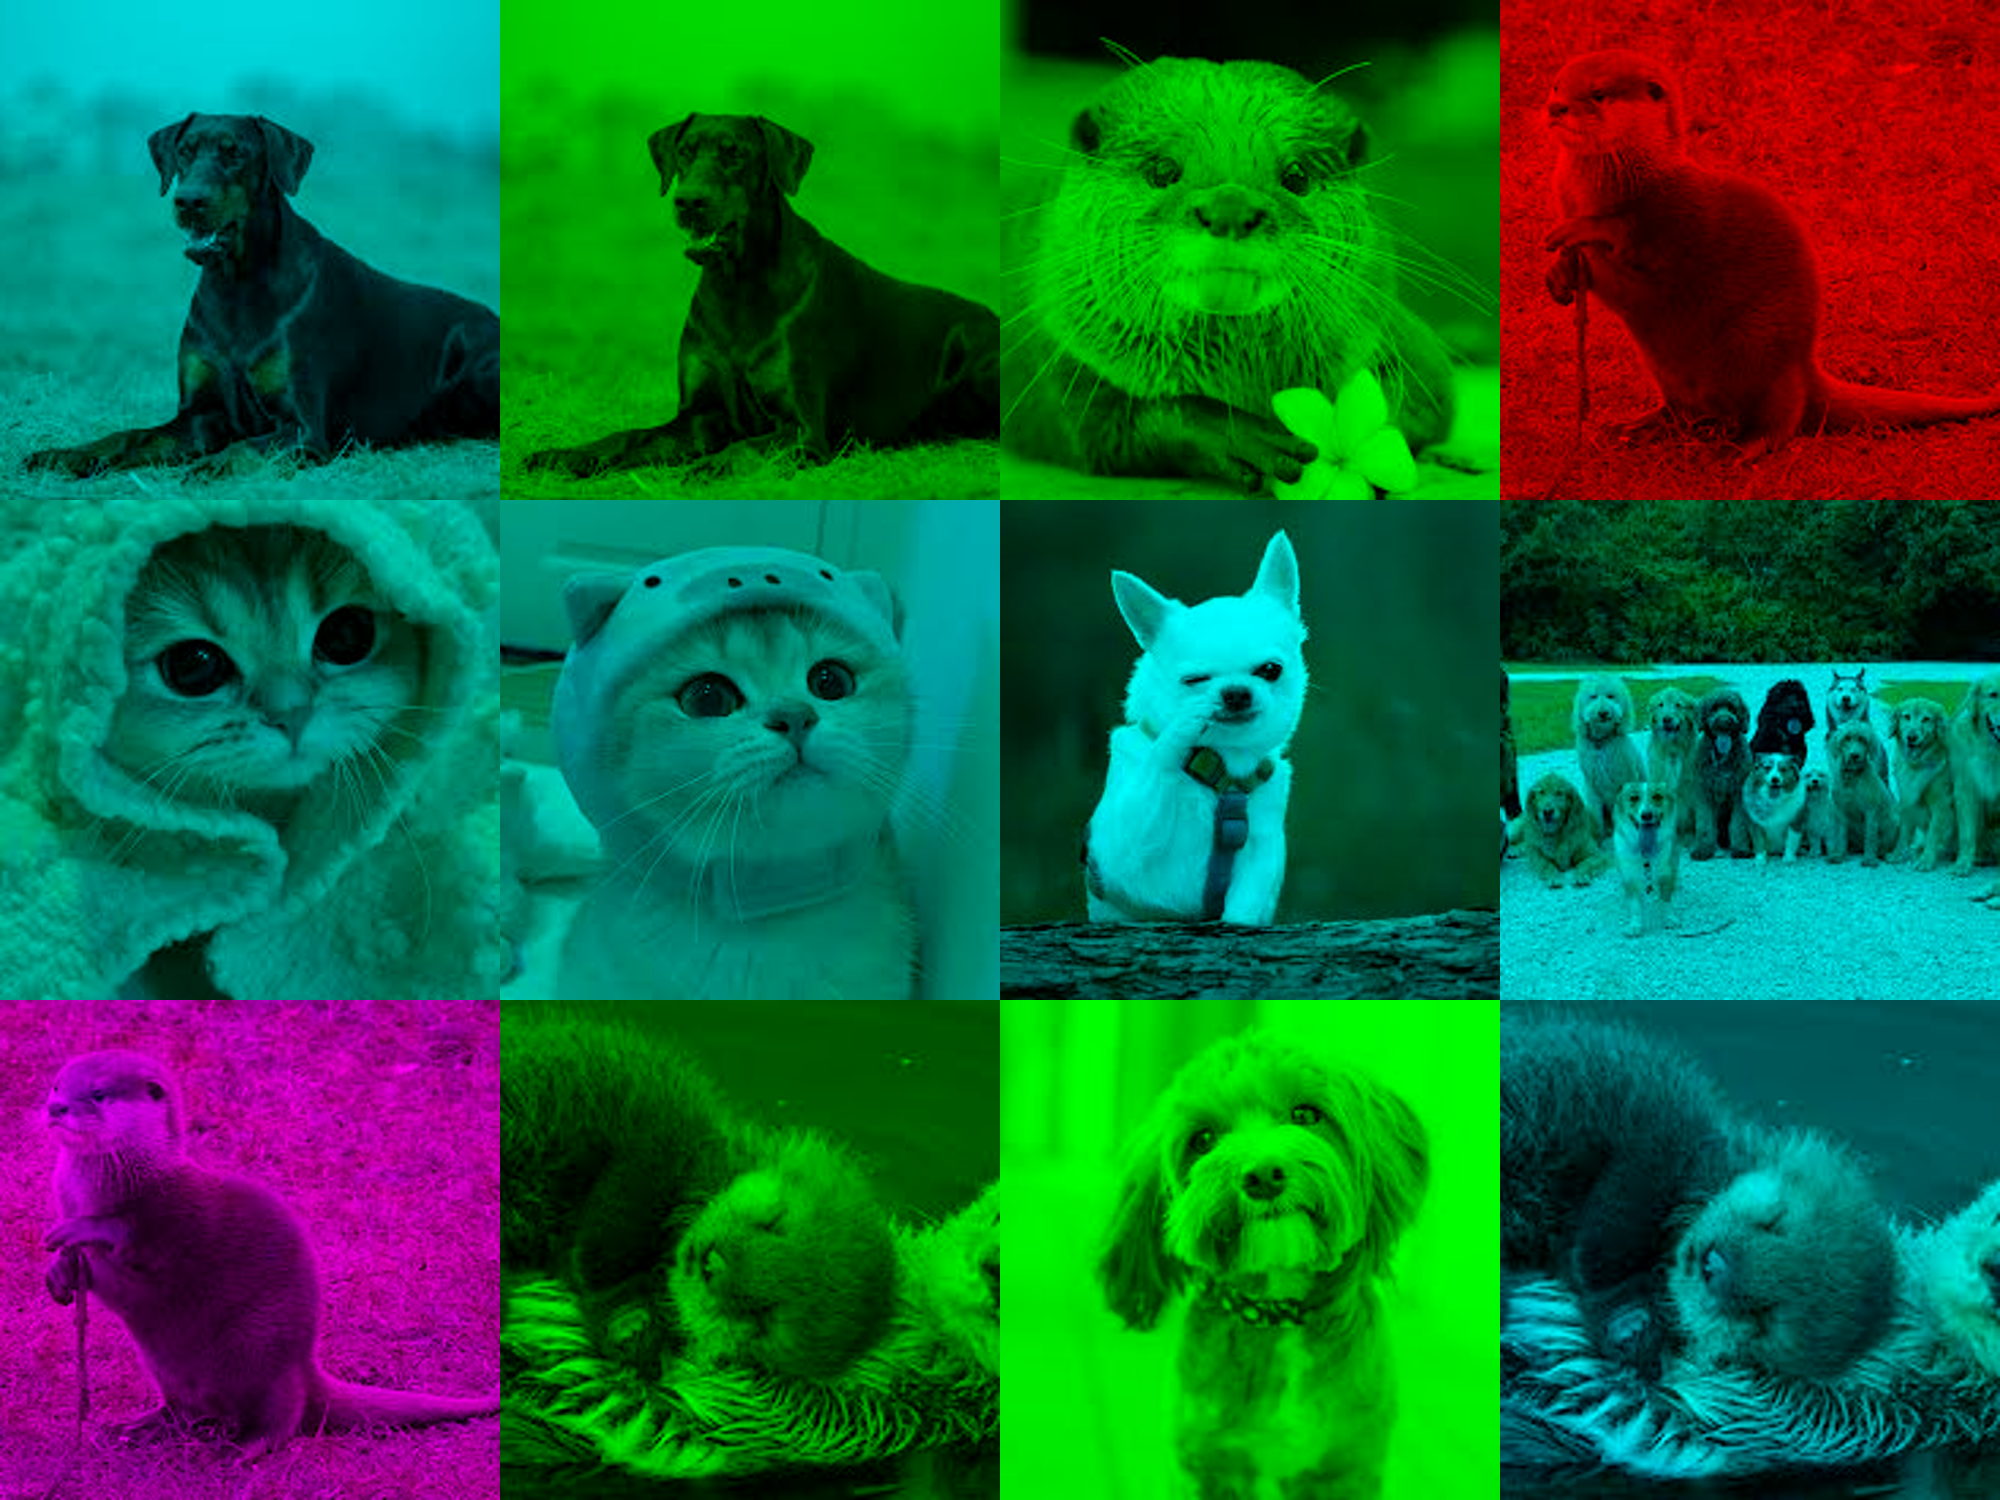

In [37]:
# Створюємо постер 4x3
poster = create_poster(source_folder, 'poster2.jpg', 4, 3)

# Виводимо постер в Jupyter
display(poster)

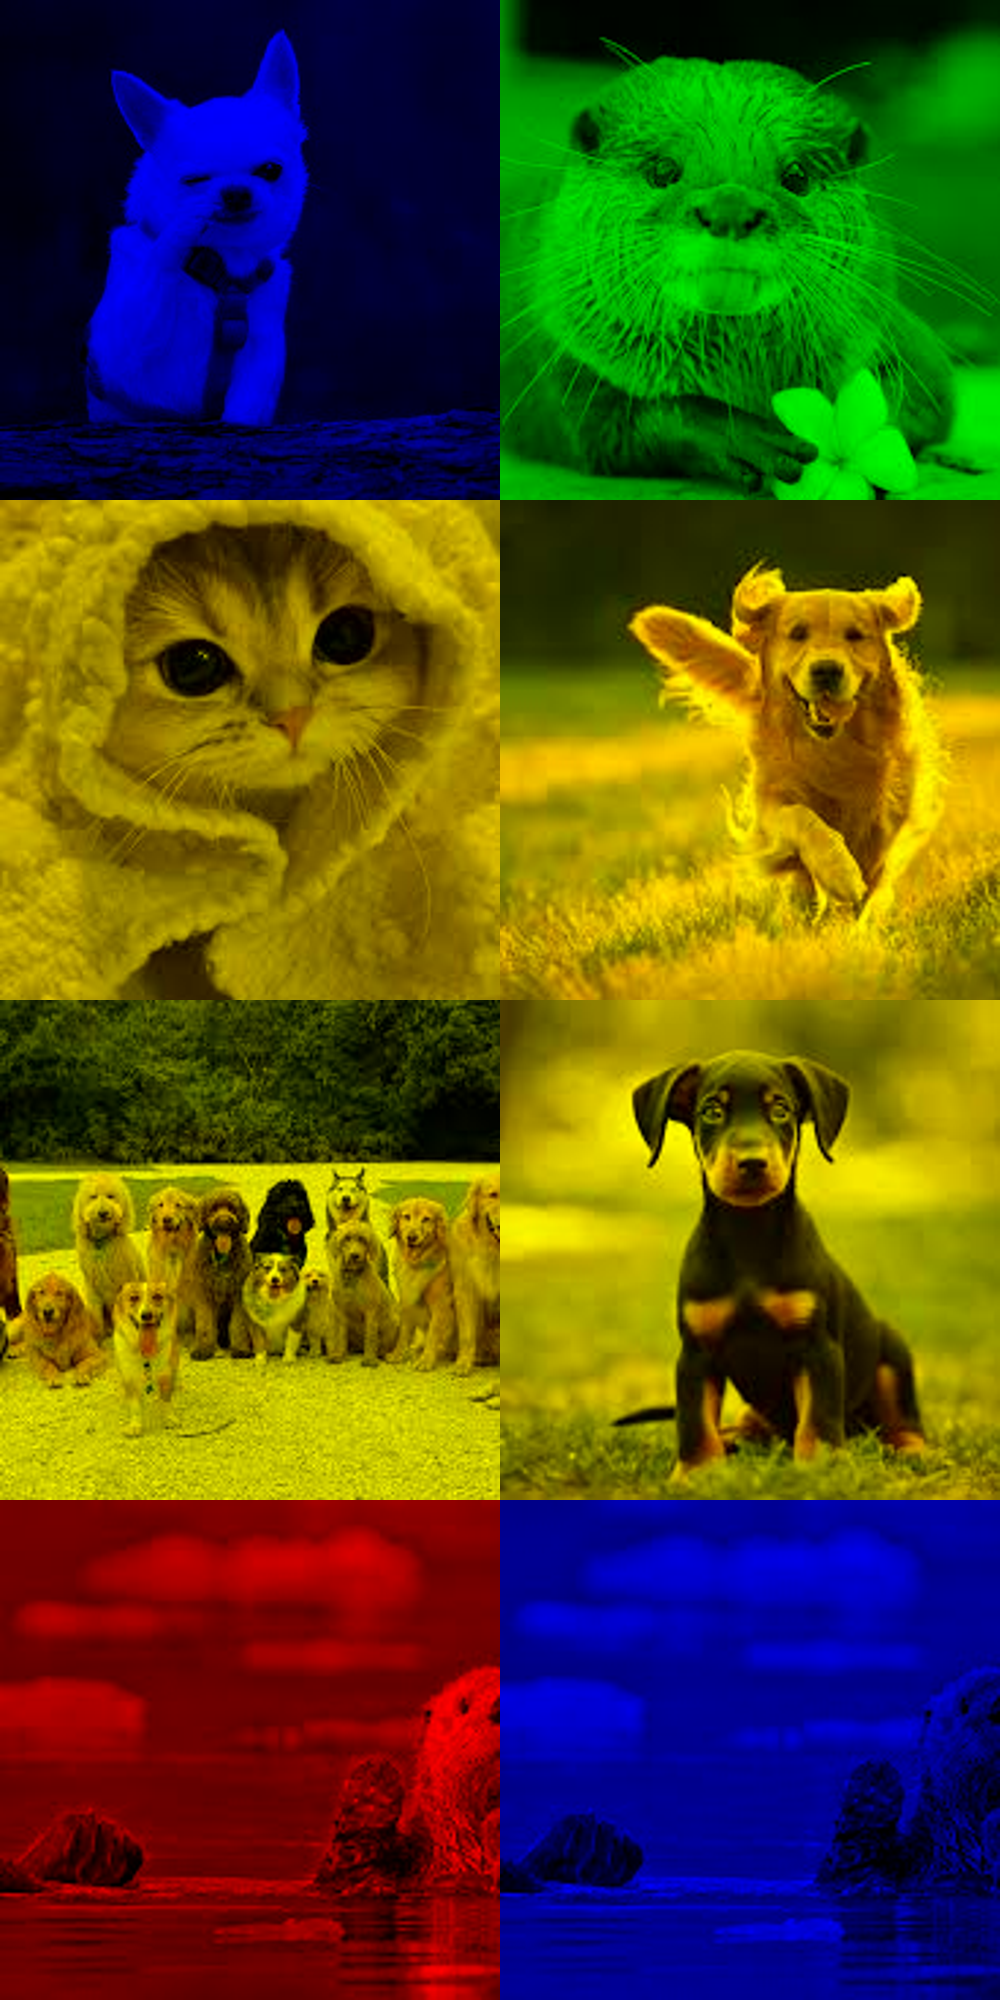

In [38]:
# Створюємо постер 2x4
poster = create_poster(source_folder, 'poster3.jpg', 2, 4)

# Виводимо постер в Jupyter
display(poster)